<!--NAVIGATION-->
< [Teorema Central do Limite](001.Teorema-Central-do-Limite.ipynb) | [Conteúdo](Index.ipynb) | [Para que serve uma amostra de tamanho grande](003.Para-que-serve-uma-amostra-de-tamanho-grande.ipynb) >

<a href="https://colab.research.google.com/github/fmafonseca/statistical-thinking-data-science/blob/master/notebooks/002.Intervalo-de-Confiança-Margem-de-Erro-Acurácia-e-Precisão.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Intervalo de Confiança, Margem de Erro, Acurácia e Precisão

Como vimos [aqui](001.Teorema-Central-do-Limite.ipynb), <mark>quando certas condições (independência e tamanho das amostras) são respeitadas</mark>, então, o **Teorema Central do Limite** (***Central Limit Theorem - CLT***) estabelece que mesmo que a **<font color=orange>população</font>** (***<font color=orange>population</font>***) não tenha uma distribuição normal, <mark>a <strong><font color=blue>distribuição amostral</font></strong> (<strong><em><font color=blue>sampling distribution</font></em></strong>) das <strong><font color=blue>estatísticas das amostras</font></strong> (<strong><em><font color=blue>sample statistics</font></em></strong>) será <strong>aproximadamente normal</strong> (<strong><em>nearly normal</em></strong>).</mark>

Ser **aproximadamente normal** (***nearly normal***) significa que, em termos práticos, podemos assumir que é uma Normal. Poder assumir que é uma Normal significa tirar vantagem de uma série de propriedades matemáticas. Para verificarmos um exemplo concreto, considere a **distribuição normal padrão** (***standard normal distribution***), ou seja, a distribuição normal com média $\mu=0$ e desvio padrão $\sigma=1$:

$$
X \sim N \left(\mu=0, \sigma=1 \right)
$$

In [1]:
from scipy import stats as st

mu = 0
sd = 1
standard_normal = st.norm(loc=mu, scale=sd)
distribution_name = "Normal(mean={0},sd={1})".format(mu, sd)

In [2]:
import pandas as pd
import numpy as np

# import some dependencies to visualization with altair
import altair as alt
alt.renderers.enable('notebook') # for the notebook only (not for JupyterLab) run this command once per session

def draw_density_plot(distribution, distribution_name):
    # Create the points to draw the probability density function
    x_i = distribution.ppf(0.001)
    x_f = distribution.ppf(0.999)
    x = np.linspace(x_i, x_f, 100)
    f_x = distribution.pdf(x)
    
    # draw the density function f(x)
    data = pd.DataFrame({'x': x, 'f(x)': f_x})
    density = alt.Chart(data).mark_line().encode(
        x='x:Q',
        y='f(x):Q'
    ).properties(title='{0}'.format(distribution_name))
    
    return density

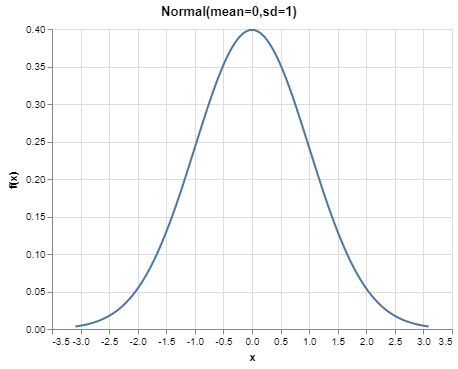

In [3]:
draw_density_plot(standard_normal, distribution_name)

O gráfico acima representa a **função densidade de probabilidade** (***probability density function - PDF***) da **distribuição normal padrão** (***standard normal distribution***) onde é possível observar que trata-se de uma curva centrada em zero ($\mu=0$) e **simétrica** ao redor do zero.

Os valores no eixo $x$ podem ser interpretados como o número de **desvios padrão** (***standard deviations***) acima (positivo) ou abaixo (negativo) da média ($\mu=0$). No caso da **distribuição normal padrão** (***standard normal distribution***) esses valores do eixo $x$ são denominados **escore-z** (***z-score***), por isto, a **distribuição normal padrão** (***standard normal distribution***) também é conhecida como **distribuição z** (***z distribution***).

Por exemplo, considere o **escore-z** (***z-score***) de $-1,959963984540054$ na **função densidade de probabilidade** (***probability density function***) da **distribuição normal padrão** (***standard normal distribution***) ...

In [4]:
z_score1 = -1.959963984540054

In [5]:
from altair import datum

def draw_density_and_zscore_plot(distribution, distribution_name, z_score, draw_area=False, type_area='left_area'):
    
    density = draw_density_plot(distribution, distribution_name)
    
    z_score_mark_rule = density.mark_rule(color='red').encode(
        x='z_score_value:Q',
        size=alt.value(1)
    ).transform_calculate(
        z_score_value=str(z_score)
    )
    
    plot = density + z_score_mark_rule
    
    if draw_area:
        if type_area == 'left_area':
            predicate = alt.FieldLTEPredicate(field='x', lte=z_score)
        elif type_area == 'range_area':
            z_score_mark_rule2 = density.mark_rule(color='red').encode(
                x='z_score_value:Q',
                size=alt.value(1)
            ).transform_calculate(
                z_score_value=str(-z_score)
            )
            
            plot = density + z_score_mark_rule + z_score_mark_rule2

            predicate = alt.FieldRangePredicate(
                field='x', 
                range=[(z_score if z_score < 0 else -z_score), (z_score if z_score > 0 else -z_score)]
            )
        else:
            predicate = alt.FieldGTEPredicate(field='x', gte=z_score)
            
        z_score_mark_area = density.mark_area().encode(
            x='x:Q',
            y='f(x):Q'
        ).transform_filter(
            predicate
        )
        plot = plot + z_score_mark_area
    
    return plot

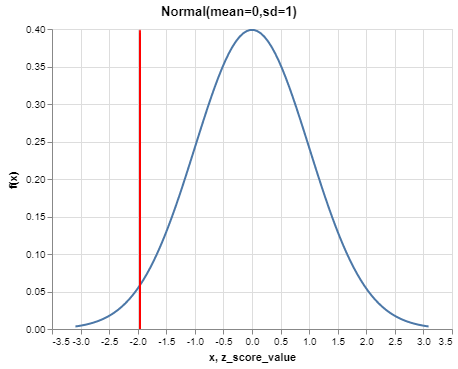

In [6]:
draw_density_and_zscore_plot(standard_normal, distribution_name, z_score1)

Ao calcularmos a área sobre a curva que representa a **função densidade de probabilidade** (***probability density function***) da **distribuição normal padrão** (***standard normal distribution***) para os **escores-z** (***z-scores***) menores ou iguais a $-1,959963984540054$ (ou seja, todos os valores de $x$ à esquerda da linha vermelha) obteremos o valor $0,025$.

A interpretação deste $0,025$ é a de que numa **distribuição normal padrão** (***standard normal distribution***) há uma probabilidade de $2,5\%$ de obtermos valores com $1,959963984540054$ ou mais **desvios padrão** (***standard deviations***) **<font color=magenta>abaixo</font>** da média zero.

In [7]:
# use the CDF (cumulative distribution function) to calculate the probability 
# that we will take a value less than or equal to x (z_score1)
probability = standard_normal.cdf(x=z_score1)

print("z-score = {0}".format(z_score1))
print("cumulative distribution function at z-score = {0} ({1}%)".format(probability, probability*100))

z-score = -1.959963984540054
cumulative distribution function at z-score = 0.025 (2.5%)


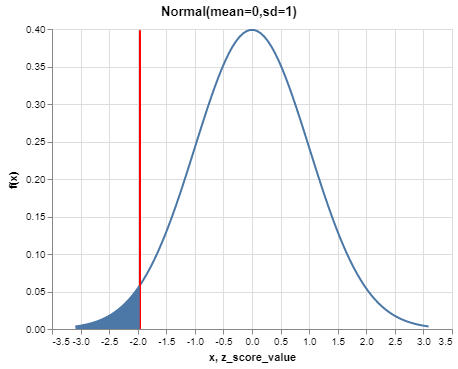

In [8]:
draw_density_and_zscore_plot(standard_normal, distribution_name, z_score1, True, 'left_area')

Como a distribuição normal é **simétrica**, então, também há uma probabilidade de $2,5\%$ de obtermos valores com $1,959963984540054$ ou mais **desvios padrão** (***standard deviations***) **<font color=magenta>acima</font>** da média zero.

In [9]:
z_score2 = -z_score1

# once that the CDF (cumulative distribution function) returns the probability 
# that we will take a value "less than or equal" to x, so, in order to get the
# other side (right side) we have to use the complement: 1.0 minus the CDF value
probability = 1.0 - standard_normal.cdf(x=z_score2)

print("z-score = {0}".format(z_score2))
print("cumulative distribution function at z-score = {0:.3f} ({1:.1f}%)".format(probability, probability*100))

z-score = 1.959963984540054
cumulative distribution function at z-score = 0.025 (2.5%)


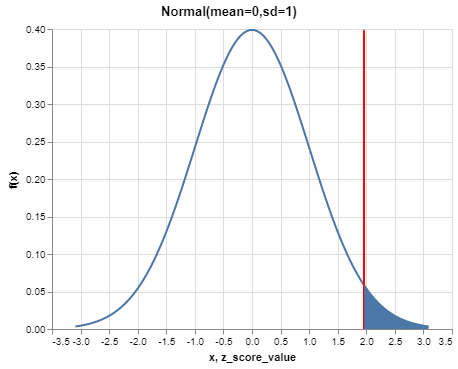

In [10]:
draw_density_and_zscore_plot(standard_normal, distribution_name, z_score2, True, 'right_area')

De modo similiar, numa **distribuição normal padrão** (***standard normal distribution***) há uma probabilidade de $95\%$ de obtermos valores com $1,959963984540054$ **desvios padrão** (***standard deviations***) **<font color=magenta>ao redor</font>** da média.

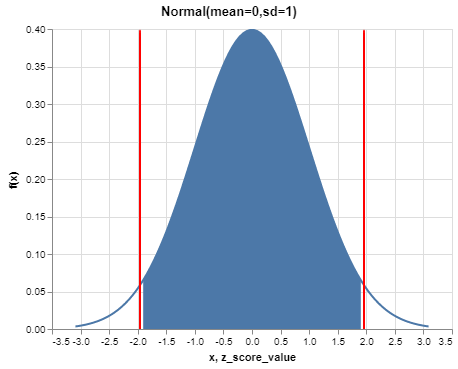

In [11]:
draw_density_and_zscore_plot(standard_normal, distribution_name, z_score1, True, 'range_area')

## Algoritmos e inferência, um primeiro ponto de vista

Então, suponha que você tenha em mãos uma **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample</font>***) $x = \{ x_1, x_2, \ldots, x_n \}$ de tamanho $n$ que foi coletada de alguma **<font color=orange>população</font>** (***<font color=orange>population</font>***) e que estes valores $x_1, x_2, \ldots, x_n$ se aplicam a algum fenômeno do seu interesse (digamos, a quantidade de alunos matriculados no ensino fundamental em $n$ municípios do estado de Minas Gerais).

Você precisa de uma estimativa para a <font color=orange>média</font> ($\mu$) da **<font color=orange>população</font>** (***<font color=orange>population</font>***). Com a **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample size</font>***) $x = \{ x_1, x_2, \ldots, x_n \}$ em mãos, a melhor estimativa que você pode ter para a <font color=orange>média</font> ($\mu$) da **<font color=orange>população</font>** (***<font color=orange>population</font>***) é a <font color=gray>média</font> ($\bar{x}$) desta **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample</font>***).

Aqui, o nosso **<font color=magenta>algoritmo</font>** para calcular a melhor estimativa para o parâmetro de interesse é a **média aritmética**:

$$
\bar{x} = \sum_{i=1}^n \frac{x_i}{n}
$$

Mas qual a **incerteza** (***uncertanty***) em relação a esta estimativa? Em outras palavras, o quão **preciso** é este número $\bar{x}$?

Voltando ao **Teorema Central do Limite** (***Central Limit Theorem - CLT***), já sabemos que, <mark>sob certas condições</mark>, a distribuição das **<font color=blue>estatísticas das amostras</font>** (***<font color=blue>sample statistics</font>***) é **aproximadamente normal** (***nearly normal***), sendo que quando a **<font color=blue>estatística da amostra</font>** (***<font color=blue>sample statistic</font>***) é a **média**, então, esta distribuição é centrada na <font color=orange>média da população</font> (*<font color=orange>population mean</font>*) $\mu$, e com um <font color=blue>desvio padrão</font> (*<font color=blue>standard deviation</font>*) $SE$ igual ao <font color=orange>desvio padrão da população</font> (*<font color=orange>population standard deviation</font>*) $\sigma$ dividido pela raiz quadrada do <font color=gray>tamanho das amostras</font> (*<font color=gray>samples size</font>*) $n$.

$$
\bar{X} \sim N\left(mean=\mu, SE=\frac{\sigma}{\sqrt{n}}\right)
$$

Então, o <font color=blue>desvio padrão</font> (*<font color=blue>standard deviation</font>*) $SE = \frac{\sigma}{\sqrt{n}}$ desta distribuição das <font color=blue>médias</font> $\bar{X}$ é, na verdade, uma **medida do erro** da nossa estimativa $\bar{x}$ e, portanto, $SE$ fornece uma **<font color=magenta>inferência</font>** a respeito da **precisão** do nosso **<font color=magenta>algoritmo</font>** (a média aritmética).

Por este motivo, o <font color=blue>desvio padrão</font> (*<font color=blue>standard deviation</font>*) $SE$ desta distribuição das <font color=blue>médias</font> $\bar{X}$ é denominado de **erro padrão** (***standard error***):

>*The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its <font color=blue>sampling distribution</font> or an estimate of that standard deviation. If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM).*
<small>(Fonte: https://en.wikipedia.org/wiki/Standard_error)</small>

Aqui vale trazer de volta a citação ...

>"*Very broadly speaking, <font color=magenta>algorithms</font> are what statisticians do while <font color=magenta>inference</font> says why they do them. A particularly energetic brand of the statistical enterprise has flourished in the new century, data science, emphasizing <font color=magenta>algorithmic thinking</font> rather than <strong><font color=magenta>its inferential justification</font></strong>.*"
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

No entanto, tipicamente, não conhecemos o <font color=orange>desvio padrão da população</font> (*<font color=orange>population standard deviation</font>*) $\sigma$, porém, podemos estimá-lo através do <font color=gray>desvio padrão da amostra</font> (*<font color=gray>sample standard deviation</font>*) $s$. Logo, 

$$
SE \approx \hat{se} = \frac{s}{\sqrt{n}}
$$

Então, ao invés de reportar somente a estimativa $\bar{x}$, podemos reportar alguma incerteza sobre esta estimativa através de $\bar{x} \pm \hat{se}$.

## Intervalo de confiança, margem de erro,  nível de confiança e um pouco de teoria

Porém, ao invés de reportar a incerteza para a nossa estimativa através da fórmula $\bar{x} \pm \hat{se}$, podemos aproveitar o fato de que o **Teorema Central do Limite** (***Central Limit Theorem - CLT***) também estabelece que a distribuição das estimativas $\bar{X}$ é **aproximadamente normal** (***nearly normal***).

Se a distribuição é normal, então, já sabemos que $95\%$ dos valores da distribuição estarão concentrados em um intervalo de $1,959963984540054$ **desvios padrão** (***standard deviations***) ao redor da média. A partir desta propriedade matemática da distribuição normal podemos estabelecer um **nível de confiança** (***confidence level***) <mark><strong>para o nosso procedimento de obtenção da estimativa</strong></mark> (o grifo aqui é proposital, repare que o nível de confiança se refere ao procedimento de obtenção e não à estimativa em si - tentarei esclarecer isto no texto abaixo).

***
<mark>Em outras palavras, pela expressão $\bar{X} \sim N\left(mean=\mu, SE=\frac{\sigma}{\sqrt{n}}\right)$ oriunda do <strong>Teorema Central do Limite</strong> (<strong><em>Central Limit Theorem - CLT</em></strong>), podemos assumir que $95\%$ das <strong><font color=gray>amostras aleatórias</font></strong> (<strong><em><font color=gray>random samples</font></em></strong>) terão médias ($\bar{x}$) que estarão a $1,959963984540054$ <font color=blue>desvios padrão</font> (<em><font color=blue>standard deviations</font></em>) da <font color=orange>média</font> ($\mu$) da <strong><font color=orange>população</font></strong> (<strong><em><font color=orange>population</font></em></strong>).</mark>

<mark>Claramente então, para $95\%$ das <strong><font color=gray>amostras aleatórias</font></strong> (<strong><em><font color=gray>random samples</font></em></strong>), a desconhecida <font color=orange>média</font> ($\mu$) da <strong><font color=orange>população</font></strong> (<strong><em><font color=orange>population</font></em></strong>) que queremos estimar estará dentro de $1,959963984540054$ <font color=blue>erros padrão</font> (<em><font color=blue>standard errors</font></em>) da <font color=gray>média</font> ($\bar{x}$) da <strong><font color=gray>amostra aleatória</font></strong> (<strong><em><font color=gray>random sample</font></em></strong>).</mark>

<mark>Note o cuidado com a linguagem aqui. A medida $95\%$ aqui somente se aplica a <strong><font color=gray>amostras aleatórias</font></strong> (<strong><em><font color=gray>random samples</font></em></strong>) $X$ no abstrato, ou seja, ainda não observadas mas que poderiam ser observadas no futuro. No entanto, a partir do momento em que observamos uma <strong><font color=gray>amostra aleatória</font></strong> (<strong><em><font color=gray>random sample</font></em></strong>) $x = \{ x_1, x_2, \ldots, x_n \}$ concreta, então, a <font color=gray>média</font> $\bar{x}$ desta <strong><font color=gray>amostra aleatória</font></strong> (<strong><em><font color=gray>random sample</font></em></strong>) estará ou não estará (binário: $100\%$ ou $0\%$) dentro do intervalo de $1,959963984540054$ <font color=blue>desvios padrão</font> (<em><font color=blue>standard deviations</font></em>) da <font color=orange>média</font> ($\mu$) da <strong><font color=orange>população</font></strong> (<strong><em><font color=orange>population</font></em></strong>).</mark>
***

Então, o **intervalo de confiança** (***confidence interval***) de $95\%$ pode ser construído a partir de uma **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample</font>***) $x = \{ x_1, x_2, \ldots, x_n \}$ como

$$
\bar{x} \pm \left( 1,959963984540054 \times \hat{se} \right)
$$

onde $\bar{x}$ é a **média aritmética** desta **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample</font>***) e $\hat{se}$ é a estimativa para o **erro padrão** (***standard error***).

Nesta fórmula, o termo $1,959963984540054 \times \hat{se}$ é denominado de **margem de erro** (***margin of error - ME***). Então, de modo mais genérico temos que o **intervalo de confiança** (***confidence interval***) é dado por:

$$
\bar{x} \pm ME
$$

ou seja, 

$$
\bar{x} \pm \left( z^{\star} \times \hat{se} \right)
$$

ou seja (para o caso da **média**), 

$$
\bar{x} \pm \left( z^{\star} \times \frac{s}{\sqrt{n}} \right)
$$

onde, $s$ é desvio padrão (*standard deviation*) da amostra, $n$ é o tamanho da amostra e $z^{\star}$ representa o escore-z (*z-score*) de acordo com o **nível de confiança** (***confidence level***) desejado -- para um nível de confiança (*confidence level*) de $95\%$ o escore-z (*z-score*) será $z^{\star} = 1,959963984540054$.

Outros **níveis de confiança** (***confidence levels***) comuns são de $90\%$ e $99\%$.

In [12]:
def draw_density_and_CLs_plot(distribution, distribution_name, z_score_90CL, z_score_95CL, z_score_99CL):
    
    density = draw_density_plot(distribution, distribution_name)
    
    # draw lines that represent confidence levels
    color_value = 'red'
    data = pd.DataFrame({
        'x1_90cl': 2*[-z_score_90CL], 'x2_90cl': 2*[z_score_90CL], 'cl_90_label': '90% confidence level',
        'x1_95cl': 2*[-z_score_95CL], 'x2_95cl': 2*[z_score_95CL], 'cl_95_label': '95% confidence level',
        'x1_99cl': 2*[-z_score_99CL], 'x2_99cl': 2*[z_score_99CL], 'cl_99_label': '99% confidence level',
        'f(x)': [0, 0.4]
    })
    z_score_90CL_inf_mark = alt.Chart(data).mark_line(color=color_value).encode(
        x='x1_90cl', y='f(x)', opacity='cl_90_label'
    )
    z_score_90CL_sup_mark = alt.Chart(data).mark_line(color=color_value).encode(
        x='x2_90cl', y='f(x)', opacity='cl_90_label'
    )
    
    z_score_95CL_inf_mark = alt.Chart(data).mark_line(color=color_value).encode(
        x='x1_95cl', y='f(x)', opacity='cl_95_label'
    )
    z_score_95CL_sup_mark = alt.Chart(data).mark_line(color=color_value).encode(
        x='x2_95cl', y='f(x)', opacity='cl_95_label'
    )
    
    z_score_99CL_inf_mark = alt.Chart(data).mark_line(color=color_value).encode(
        x='x1_99cl', y='f(x)', opacity='cl_99_label'
    )
    z_score_99CL_sup_mark = alt.Chart(data).mark_line(color=color_value).encode(
        x='x2_99cl', y='f(x)', opacity='cl_99_label'
    )
    
    cl90_plot = z_score_90CL_inf_mark + z_score_90CL_sup_mark
    cl95_plot = z_score_95CL_inf_mark + z_score_95CL_sup_mark
    cl99_plot = z_score_99CL_inf_mark + z_score_99CL_sup_mark
    return density + cl90_plot + cl95_plot + cl99_plot

In [13]:
confidence_level_90 = 0.90
confidence_level_95 = 0.95
confidence_level_99 = 0.99

z_score_90CL = np.abs(standard_normal.ppf(q=(1-confidence_level_90)/2.0))
z_score_95CL = np.abs(standard_normal.ppf(q=(1-confidence_level_95)/2.0))
z_score_99CL = np.abs(standard_normal.ppf(q=(1-confidence_level_99)/2.0))

print("confidence level = {0:.1f}% | z-score = {1}".format(confidence_level_90*100, z_score_90CL))
print("confidence level = {0:.1f}% | z-score = {1}".format(confidence_level_95*100, z_score_95CL))
print("confidence level = {0:.1f}% | z-score = {1}".format(confidence_level_99*100, z_score_99CL))

confidence level = 90.0% | z-score = 1.6448536269514729
confidence level = 95.0% | z-score = 1.959963984540054
confidence level = 99.0% | z-score = 2.5758293035489004


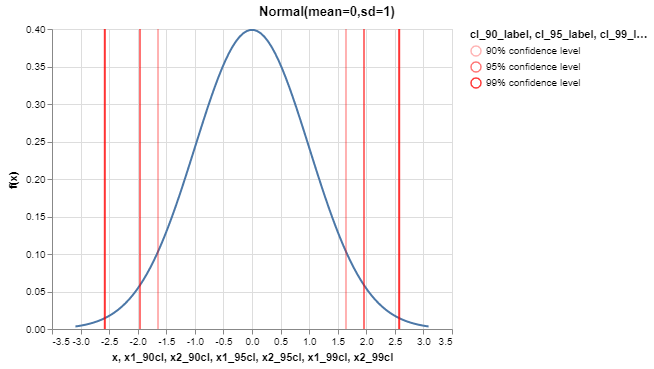

In [14]:
draw_density_and_CLs_plot(standard_normal, distribution_name, z_score_90CL, z_score_95CL, z_score_99CL)

## Condições para a utilização do intervalo de confiança

Uma vez que a construção dos **intervalos de confiança** (***confidence intervals***) é inteiramente baseada no **Teorema Central do Limite** (***Central Limit Theorem - CLT***), então, as premissas que assumimos ao construir um **intervalo de confiança** (***confidence interval***) são as mesmas já vistas [aqui](001.Teorema-Central-do-Limite.ipynb) para o **Teorema Central do Limite** (***Central Limit Theorem - CLT***), ou seja:
 - **Independência** (***Independence***): as <font color=gray>unidades amostradas aleatoriamente</font> (*<font color=gray>randomly sampled units</font>*) devem ser independentes, ou seja, a ocorrência de uma dada <font color=gray>unidade amostrada</font> (*<font color=gray>sampled unit</font>*) da <font color=orange>população</font> (*<font color=orange>population</font>*) não afeta a probabilidade da ocorrência de outra.
 - **Tamanho da Amostra/Amostra Enviesada** (***Sample Size/Skewed***): ou a distribuição da <font color=orange>população</font> (*<font color=orange>population</font>*) é normal, ou se a distribuição da <font color=orange>população</font> (*<font color=orange>population</font>*) é enviesada (*skewed*), o <font color=gray>tamanho da amostra</font> (*<font color=gray>sample size</font>*) tem que ser grande (regra de ouro: $n > 30$).

## Interpretações do intervalo de confiança

Para verificarmos as interpretações **<font color=green>corretas</font>** e as **<font color=red>equivocadas</font>** a respeito do conceito do **intervalo de confiança** (***confidence interval***), considere o seguinte exemplo:

> *The General Social Survey (GSS) is a sociological survey used to collect data on demographic characteristics and attitudes of residents of the United States. In 2010, the survey collected responses from 1,154 US residents. Based on the survey results, a 95% confidence interval for the average number of hours Americans have to relax or pursue activities that they enjoy after an average work day was found to be 3.53 to 3.83 hours.*
<small>(Fonte: [Inferential Statistics](https://www.coursera.org/learn/inferential-statistics-intro/home/welcome), by Duke University, at Coursera)</small>

Algumas interpretações **<font color=green>corretas</font>** para o conceito do **intervalo de confiança** (***confidence interval***) são:
- Estamos $95\%$ confiantes de que os americanos gastam em média de $3,53$ a $3,83$ horas relaxando após um dia de trabalho.
- $95\%$ de <font color=gray>amostras aleatórias</font> (*<font color=gray>random samples</font>*) de $1.154$ americanos irão resultar em intervalos de confiança (*confidence intervals*) que possuem o número médio real de horas que os americanos consomem para relaxar após um dia de trabalho.
- Se este procedimento fosse repetido em várias amostras de $1.154$ americanos, a fração de intervalos de confiança (*confidence intervals*) calculados (que seriam diferentes para cada amostra) que abrangem o número médio real de horas que os americanos consomem para relaxar após um dia de trabalho tenderia a $95\%$.

Algumas interpretações **<font color=red>equivocadas</font>** para o conceito do **intervalo de confiança** (***confidence interval***) são:
- O intervalo entre $3,53$ e $3,83$ horas tem uma chance de $95\%$ de conter o número médio real de horas que os americanos consomem para relaxar após um dia de trabalho.
  - Esta interpretação é **<font color=red>equivocada</font>** pois um intervalo de confiança (*confidence interval*) informado é um intervalo entre dois números. A frequência com que um intervalo observado (por exemplo, $3,53 - 3,83$) contém o valor real de interesse é $100\%$ se o valor real estiver dentro do intervalo ou $0\%$ do contrário. Os $95\%$ referem-se apenas à frequência com que intervalos de confiança (*confidence intervals*) de $95\%$ calculados a partir de muitos estudos conteriam o valor real se todas as suposições usadas para calcular os intervalos estivessem corretas.
- $95\%$ das vezes o número médio real de horas que os americanos consomem para relaxar após um dia de trabalho está entre $3,53$ e $3,83$ horas.
  - Esta interpretação é **<font color=red>equivocada</font>** pois o parâmetro da <font color=orange>população</font> (*<font color=orange>population</font>*) não é um alvo em movimento que, às vezes, está dentro de um intervalo e, às vezes, fora dele.
- $95\%$ dos americanos gastam de $3,53$ a $3,83$ horas relaxando após um dia de trabalho.
  - Esta interpretação é **<font color=red>equivocada</font>** uma vez que o intervalo de confiança (*confidence interval*) não se refere aos indivíduos da <font color=orange>população</font> (*<font color=orange>population</font>*) mas sim ao parâmetro real da <font color=orange>população</font> (*<font color=orange>population</font>*).
- Estamos $95\%$ confiantes de que os americanos nesta amostra gastam em média de $3,53$ a $3,83$ horas relaxando após um dia de trabalho.
  - Esta interpretação é **<font color=red>equivocada</font>** pois o intervalo de confiança (*confidence interval*) não é sobre a média da <font color=gray>amostra</font>, mas sim sobre a média da <font color=orange>população</font> (*<font color=orange>population</font>*).
  
Para mais detalhes a respeito de interpretações equivocadas sugiro a leitura do artigo:

>Greenland, Sander and Senn, Stephen J. and Rothman, Kenneth J. and Carlin, John B. and Poole, Charles and Goodman, Steven N. and Altman, Douglas G. ***Statistical tests, P values, confidence intervals, and power: a guide to misinterpretations***. European Journal of Epidemiology - 01-Apr-2016 - volume 31, number 4, pages 337--350 (https://doi.org/10.1007/s10654-016-0149-3).

## Acurácia vs. Precisão

Os termos **acurácia** (***accuracy***) e **precisão** (***precision***) no contexto de **intervalo de confiança** (***confidence interval***) são definidos como:
- **Acurácia** (***accuracy***): o intervalo de confiança (*confidence interval*) contém ou não o <font color=orange>parâmetro real</font> de interesse da <font color=orange>população</font> (*<font color=orange>population</font>*)?
- **Precisão** (***precision***): qual a largura do intervalo de confiança (*confidence interval*)?

Já vimos anteriormente que o **intervalo de confiança** (***confidence interval***) para a **média** de uma <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) $x = \{ x_1, x_2, \ldots, x_n \}$ é dado por:

$$
\bar{x} \pm \left( z^{\star} \times \frac{s}{\sqrt{n}} \right)
$$

onde, $s$ é o <font color=gray>desvio padrão</font> (*<font color=gray>standard deviation</font>*) da <font color=gray>amostra</font>, $n$ é o tamanho da amostra e $z^{\star}$ representa o escore-z (*z-score*) de acordo com o **nível de confiança** (***confidence level***) desejado.

Vimos também que alguns **níveis de confiança** (***confidence levels***) comuns são $90\%$, $95\%$ e $99\%$.

In [15]:
confidence_level_90 = 0.90
confidence_level_95 = 0.95
confidence_level_99 = 0.99

z_score_90CL = np.abs(standard_normal.ppf(q=(1-confidence_level_90)/2.0))
z_score_95CL = np.abs(standard_normal.ppf(q=(1-confidence_level_95)/2.0))
z_score_99CL = np.abs(standard_normal.ppf(q=(1-confidence_level_99)/2.0))

print("confidence level = {0:.1f}% | z-score = {1}".format(confidence_level_90*100, z_score_90CL))
print("confidence level = {0:.1f}% | z-score = {1}".format(confidence_level_95*100, z_score_95CL))
print("confidence level = {0:.1f}% | z-score = {1}".format(confidence_level_99*100, z_score_99CL))

confidence level = 90.0% | z-score = 1.6448536269514729
confidence level = 95.0% | z-score = 1.959963984540054
confidence level = 99.0% | z-score = 2.5758293035489004


Então, se trabalharmos com um **nível de confiança** (***confidence level***) de $95\%$ esperamos que $95\%$ dos **intervalos de confiança** (***confidence intervals***) construídos a partir de <font color=gray>amostras aleatórias</font> (*<font color=gray>random samples</font>*) irão conter o <font color=orange>parâmetro real</font> de interesse da <font color=orange>população</font> (*<font color=orange>population</font>*).

Como exemplo, considere que o nosso fenômeno de interesse segue uma distribuição normal com média $\mu = 0$ e desvio padrão (*standard deviation*) $\sigma = 1$ e que estamos interessados em estimar o valor médio da variável que representa este fenômeno numericamente, ou seja, o <font color=orange>parâmetro real</font> de interesse da <font color=orange>população</font> (*<font color=orange>population</font>*) neste caso é $\mu = 0$.

In [16]:
# definition of the population distribution
pop_par_mu = 0 # true mean
pop_par_sd = 1
pop_distribution = st.norm(loc=pop_par_mu, scale=pop_par_sd)
pop_distribution_name = "Normal(mean={0},sd={1})".format(pop_par_mu, pop_par_sd)

Para verificar, na prática, o conceito do **nível de confiança** (***confidence levels***), vamos implementar uma simulação que irá coletar $40$ <font color=gray>amostras aleatórias</font> (*<font color=gray>random samples</font>*) de tamanhos $n = 200$ desta <font color=orange>população</font> (*<font color=orange>population</font>*).

In [17]:
replicates = 40
random_sample_size = 200

random_samples = []
for _ in range(replicates):
    random_sample = pop_distribution.rvs(size=random_sample_size)
    random_samples.append(random_sample)

Para cada uma das $40$ <font color=gray>amostras aleatórias</font> (*<font color=gray>random samples</font>*) coletadas da <font color=orange>população</font> (*<font color=orange>population</font>*) vamos:
1. Calcular a média ($\bar{x}$);
2. Calcular uma estimativa para o erro padrão (*standard error*) $\bar{se}$;
3. Calcular a margem de erro (*margin of error*) $ME$ considerando o nível de confiança (*confidence level*) de $95\%$;
4. Calcular o intervalo de confiança (*confidence interval*).

In [18]:
def make_confidence_intervals(random_samples, z_score):
    sample_means = []
    confidence_intervals = []
    for random_sample in random_samples:
        n = len(random_sample)
        sample_mean = random_sample.mean()
        estimated_SE = np.std(random_sample) / np.sqrt(n)
        ME = z_score * estimated_SE
        confidence_interval = [(sample_mean-ME), (sample_mean+ME)]

        sample_means.append(sample_mean)
        confidence_intervals.append(confidence_interval)
        
    return sample_means, confidence_intervals

In [19]:
# build confidence intervals
sample_means, confidence_intervals_95CL = make_confidence_intervals(random_samples, z_score_95CL)

Para cada um dos $40$ **intervalos de confiança** (***confidence intervals***) de $95\%$ calculados vamos:
1. Testar se o intervalo de confiança (*confidence interval*) contém o <font color=orange>parâmetro real</font> de interesse da <font color=orange>população</font> (*<font color=orange>population</font>*) que neste caso é $\mu = 0$.

In [20]:
def test_CIs_against_true_mean(confidence_intervals, true_mean):
    confidence_intervals_contains_true_mean = []
    for confidence_interval in confidence_intervals:
        confidence_intervals_contains_true_mean.append(
            (confidence_interval[0] <= true_mean) and (true_mean <= confidence_interval[1])
        )
        
    return confidence_intervals_contains_true_mean

In [21]:
# test calculated confidence intervals against the true population parameter (true_mean)
confidence_intervals_95CL_contains_true_mean = test_CIs_against_true_mean(confidence_intervals_95CL, pop_par_mu)

# count how many CIs contains the true mean
count_CIs_95CL_contains_true_mean = np.sum(confidence_intervals_95CL_contains_true_mean)
proportion_CIs_95CL_contains_true_mean = (count_CIs_95CL_contains_true_mean/float(replicates))*100

# print results
print("{0} confidence intervals of {1}% where {2} ({3}%) contains the true mean".format(
    replicates, confidence_level_95*100, count_CIs_95CL_contains_true_mean, proportion_CIs_95CL_contains_true_mean
))

40 confidence intervals of 95.0% where 38 (95.0%) contains the true mean


Visualmente temos que:

In [22]:
def draw_CIs_plot(true_mean, sample_means, confidence_level, confidence_intervals, cis_contains_true_mean):
    data = pd.DataFrame({
        'sample': np.arange(1, len(confidence_intervals)+1), 
        'sample_mean': sample_means,
        'ci_lb': [x[0] for x in confidence_intervals], 
        'ci_ub': [x[1] for x in confidence_intervals],
        'ci_contains_true_mean': cis_contains_true_mean 
    })
    
    sample_means_plot = alt.Chart(data).mark_point(filled=True).encode(
        y='sample_mean:Q',
        x='sample:O',
        color=alt.value('black')
    )
    
    ci_bars_pass = alt.Chart(data).mark_rule(color='green').encode(
        y='ci_lb:Q', y2='ci_ub:Q', x='sample:O', size=alt.value(2)
    ).transform_filter('datum.ci_contains_true_mean')
    
    ci_bars_not_pass = alt.Chart(data).mark_rule(color='red').encode(
        y='ci_lb:Q', y2='ci_ub:Q', x='sample:O', size=alt.value(2)
    ).transform_filter('!(datum.ci_contains_true_mean)')
    
    true_mean_plot = alt.Chart(data).mark_rule(color='blue').encode(
        y='true_mean:Q', size=alt.value(2)
    ).transform_calculate(true_mean=str(true_mean))
    
    count_cis = len(confidence_intervals)
    count_cis_contains_true_mean = np.sum(cis_contains_true_mean)
    proportion_cis_contains_true_mean = (count_cis_contains_true_mean/float(count_cis))*100
    chart_title = "{0} confidence intervals of {1}% where {2} ({3}%) contains the true mean".format(
        count_cis, confidence_level*100, count_cis_contains_true_mean, proportion_cis_contains_true_mean
    )
    chart = (sample_means_plot + ci_bars_pass + ci_bars_not_pass + true_mean_plot).properties(
        title=chart_title
    )
    
    return chart

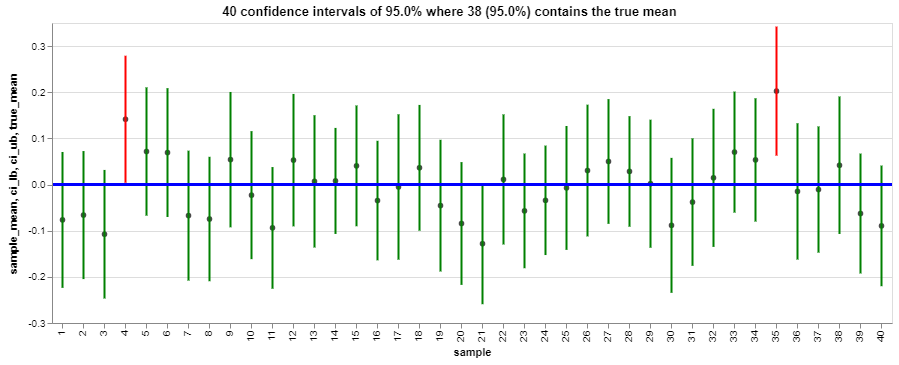

In [23]:
# draw true_mean and all confidence intervals
draw_CIs_plot(
    pop_par_mu, sample_means, confidence_level_95, confidence_intervals_95CL, confidence_intervals_95CL_contains_true_mean
)

Logo, se queremos aumentar a nossa certeza de que iremos capturar o <font color=orange>parâmetro real</font> de interesse da <font color=orange>população</font> (*<font color=orange>population</font>*), então, devemos usar um **intervalo de confiança** (***confidence interval***) mais amplo. Em outras palavras, aumentar a **acurácia** (***accuracy***) do **intervalo de confiança** (***confidence interval***) implica em aumentar a sua largura que, por sua vez, implica em aumentarmos o **nível de confiança** (***confidence level***).

Então, se calcularmos **intervalos de confiança** (***confidence intervals***) com um **nível de confiança** (***confidence level***) de $99\%$ (ao invés dos $95\%$) para as mesmas $40$ <font color=gray>amostras aleatórias</font> (*<font color=gray>random samples</font>*) coletadas da <font color=orange>população</font> (*<font color=orange>population</font>*):
1. Esperamos que a largura dos **intervalos de confiança** (***confidence intervals***) aumente;
2. Esperamos que mais intervalos (no caso, $99\%$ deles) capturem o <font color=orange>parâmetro real</font> de interesse da <font color=orange>população</font> (*<font color=orange>population</font>*) que neste caso é $\mu = 0$;
3. O que implica que esperamos aumentar a **acurácia** (***accuracy***).

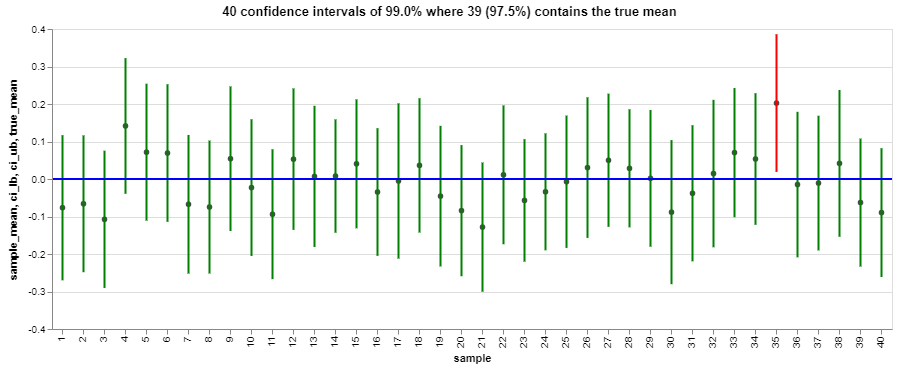

In [24]:
# build confidence intervals
sample_means, confidence_intervals_99CL = make_confidence_intervals(random_samples, z_score_99CL)

# test calculated confidence intervals against the true population parameter (true_mean)
confidence_intervals_99CL_contains_true_mean = test_CIs_against_true_mean(confidence_intervals_99CL, pop_par_mu)

# draw true_mean and all confidence intervals
draw_CIs_plot(
    pop_par_mu, sample_means, confidence_level_99, confidence_intervals_99CL, confidence_intervals_99CL_contains_true_mean
)

No entanto, o aumento da **acurácia** (***accuracy***) através do aumento da largura do **intervalo de confiança** (***confidence interval***) traz um custo, no caso, um custo de redução da **precisão** (***precision***).

Digamos que você esteja assistindo à previsão do tempo e você é informado de que no dia seguinte a temperatura mínima esperada será de $-29$&deg;$C$ e a máxima de $43$&deg;$C$. É muito provável que a temperatura no dia seguinte esteja de fato entre $-29$&deg;$C$ e $43$&deg;$C$, ou seja, teremos uma alta **acurácia** (***accuracy***) ao reportar este intervalo. No entanto, este intervalo é informativo? Em outras palavras, este intervalo reportado tem uma alta **precisão** (***precision***)? A resposta é não, pois, com base neste boletim meteorológico é impossível definir o que vestir amanhã ou o que realmente esperar em termos climáticos.

Ou seja, à medida em que o **nível de confiança** (***confidence level***) aumenta, a largura do **intervalo de confiança** (***confidence interval***) também aumenta, o que aumenta a **acurácia** (***accuracy***). No entanto, a **precisão** (***precision***) diminui.

$$
\uparrow \text{CL} \enspace \Rightarrow \enspace \uparrow \text{CI width} \enspace \Rightarrow \enspace \uparrow \text{accuracy} \enspace \Rightarrow \enspace \downarrow \text{precision}
$$

Então, como podemos obter o melhor dos dois mundos? É possível aumentar a **acurácia** (***accuracy***) e ao mesmo tempo aumentar a **precisão** (***precision***)? A resposta é sim. O caminho é aumentar o tamanho $n$ da <font color=gray>amostra </font> (*<font color=gray>sample</font>*). Se aumentarmos o tamanho $n$ da <font color=gray>amostra </font> (*<font color=gray>sample</font>*) isso reduzirá o erro padrão (*standard error*) $SE$ e, consequentemente, reduzirá a margem de erro (*margin of error*) $ME$. E, portanto, ainda será possível permanecer em um **nível de confiança** (***confidence level***) alto sem necessariamente precisar aumentar muito a largura do **intervalo de confiança** (***confidence interval***).

Vale lembrar que pelo **Teorema Central do Limite** (***Central Limit Theorem - CLT***) temos $\bar{X} \sim N\left(mean=\mu, SE=\frac{\sigma}{\sqrt{n}}\right)$ e que o **intervalo de confiança** (***confidence interval***) para a **média** é dado por $\bar{x} \pm \left( z^{\star} \times \frac{s}{\sqrt{n}} \right)$, então:

$$
\uparrow n \enspace \Rightarrow \enspace \downarrow SE \enspace \Rightarrow \enspace \downarrow ME \enspace \Rightarrow \enspace \uparrow \text{precision}
$$

## Tamanho de amostra necessário para determinada margem de erro

Se sabemos que a **margem de erro** (***margin of error***) $ME$ para a **média** é dada pela fórmula:

$$
ME = z^{\star} \times \frac{s}{\sqrt{n}}
$$

e que o valor de $z^{\star}$ determina o **nível de confiança** (***confidence level***), então, é possível determinar o tamanho necessário de uma amostra para um desejado **nível de confiança** (***confidence level***) e uma desejada **margem de erro** (***margin of error***) se soubermos de antemão o **desvio padrão** (***standard deviation***).

Para isto, basta isolar $n$ na fórmula acima para chegar em:

$$
n = \left( \frac{z^{\star} \times s}{ME} \right)^2
$$

Considere o seguinte exemplo:

>*A group of researchers want to test the possible effect of an epilepsy medication taken by pregnant mothers on the cognitive development of their children. As evidence, they want to estimate the IQ scores of three-year-old children born to mothers who were on this medication during pregnancy.*

>*Previous studies suggest that the standard deviation of IQ scores of three-year-old children is 18 points.*

>*How many such children should the researchers sample in order to obtain a 90% confidence interval with a margin of error less than or equal to 4 points?*
<small>(Fonte: [Inferential Statistics](https://www.coursera.org/learn/inferential-statistics-intro/home/welcome), by Duke University, at Coursera)</small>

In [25]:
s = 18
z_score = z_score_90CL
ME = 4

n = ((z_score * s)/ME)**2

print("n = {0}".format(n))
print("rounded n = {0}".format(np.ceil(n)))

n = 54.78725494543216
rounded n = 55.0


Logo, será necessário obter uma amostra de ao menos 55 crianças para ser possível criar um **intervalo de confiança** (***confidence interval***) com um **nível de confiança** (***confidence level***) de $90\%$ e uma **margem de erro** (***margin of error***) de no máximo 4 pontos.

## Resumo

**R1.** Um **intervalo de confiança** (***confidence interval***) é um intervalo plausível de valores para um parâmetro da <font color=orange>população</font> (*<font color=orange>population</font>*).

**R2.** O **nível de confiança** (***confidence level***) representa o percentual de <font color=gray>amostras aleatórias</font> (*<font color=gray>random samples</font>*) que irão produzir intervalos de confiança (*confidence intervals*) que irão capturar o <font color=orange>parâmetro real</font> de interesse da <font color=orange>população</font> (*<font color=orange>population</font>*).

**R3.** A distribuição aproximadamente normal (*nearly normal*) da <font color=blue>estimativa pontual</font> (*<font color=blue>point estimate</font>*) -- como sugerido pelo Teorema Central do Limite (*Central Limit Theorem - CLT*) -- implica que um **intervalo de confiança** (***confidence interval***) pode ser calculado como:

$$
\text{point_estimate} \pm z^{\star} \times SE
$$

onde $z^{\star}$ representa os pontos de corte na distribuição normal padrão (*standard normal distribution*) para capturar $XX\%$ dos dados ao redor da <font color=blue>estimativa pontual</font> (*<font color=blue>point estimate</font>*), onde $XX\%$ representa o **nível de confiança** (***confidence level***) desejado.

- Quando a <font color=blue>estimativa pontual</font> (*<font color=blue>point estimate</font>*) é a **média**, então, $\bar{x} \pm z^{\star} \times \frac{\sigma}{\sqrt{n}}$.
- $z^{\star}$ é sempre positivo.

**R4.** A **margem de erro** (***margin of error - ME***) é a distância, em ambas as direções, da <font color=blue>estimativa pontual</font> (*<font color=blue>point estimate</font>*) ao extremo do **intervalo de confiança** (***confidence interval***), ou seja, $ME = z^{\star} \times SE$

- Quando a <font color=blue>estimativa pontual</font> (*<font color=blue>point estimate</font>*) é a **média**, então, $ME = z^{\star} \times \frac{\sigma}{\sqrt{n}}$.
- $ME$ corresponde à metade da largura do **intervalo de confiança** (***confidence interval***).

**R5.** Interprete o **intervalo de confiança** (***confidence interval***) como "Estamos $XX\%$ confiantes de que o <font color=orange>parâmetro real</font> de interesse da <font color=orange>população</font> (*<font color=orange>population</font>*) está dentro do intervalo", onde $XX\%$ é o **nível de confiança** (***confidence level***) desejado.

**R6.** As relações entre **acurácia** (***accuracy***), **precisão** (***precision***) e o tamanho da <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) $n$ são:

$$
\uparrow \text{CL} \enspace \Rightarrow \enspace \uparrow \text{CI width} \enspace \Rightarrow \enspace \uparrow \text{accuracy} \enspace \Rightarrow \enspace \downarrow \text{precision}
$$

$$
\uparrow n \enspace \Rightarrow \enspace \downarrow SE \enspace \Rightarrow \enspace \downarrow ME \enspace \Rightarrow \enspace \uparrow \text{precision}
$$


*Referências*:
- https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution
- https://en.wikipedia.org/wiki/Standard_score
- https://en.wikipedia.org/wiki/Probability_density_function
- https://en.wikipedia.org/wiki/Cumulative_distribution_function
- https://en.wikipedia.org/wiki/Arithmetic_mean
- https://en.wikipedia.org/wiki/Standard_error
- https://en.wikipedia.org/wiki/Margin_of_error
- https://en.wikipedia.org/wiki/Confidence_interval
- https://link.springer.com/article/10.1007%2Fs10654-016-0149-3

<!--NAVIGATION-->
< [Teorema Central do Limite](001.Teorema-Central-do-Limite.ipynb) | [Conteúdo](Index.ipynb) | [Para que serve uma amostra de tamanho grande](003.Para-que-serve-uma-amostra-de-tamanho-grande.ipynb) >

<a href="https://colab.research.google.com/github/fmafonseca/statistical-thinking-data-science/blob/master/notebooks/002.Intervalo-de-Confiança-Margem-de-Erro-Acurácia-e-Precisão.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>